Write name of company:RELIANCE.NS
[*********************100%***********************]  1 of 1 completed
Enter the number of prediction days:60
Epoch 1/25
76/76 [==============================] - 16s 112ms/step - loss: 0.0121 - accuracy: 8.3160e-04
Epoch 2/25
76/76 [==============================] - 10s 136ms/step - loss: 0.0021 - accuracy: 4.1580e-04
Epoch 3/25
76/76 [==============================] - 13s 165ms/step - loss: 0.0019 - accuracy: 8.3160e-04
Epoch 4/25
76/76 [==============================] - 9s 120ms/step - loss: 0.0020 - accuracy: 8.3160e-04
Epoch 5/25
76/76 [==============================] - 15s 201ms/step - loss: 0.0019 - accuracy: 8.3160e-04
Epoch 6/25
76/76 [==============================] - 10s 135ms/step - loss: 0.0017 - accuracy: 8.3160e-04
Epoch 7/25
76/76 [==============================] - 13s 174ms/step - loss: 0.0017 - accuracy: 8.3160e-04
Epoch 8/25
76/76 [==============================] - 10s 132ms/step - loss: 0.0016 - accuracy: 8.3160e-04
Epoch 9/25
76/76 [=

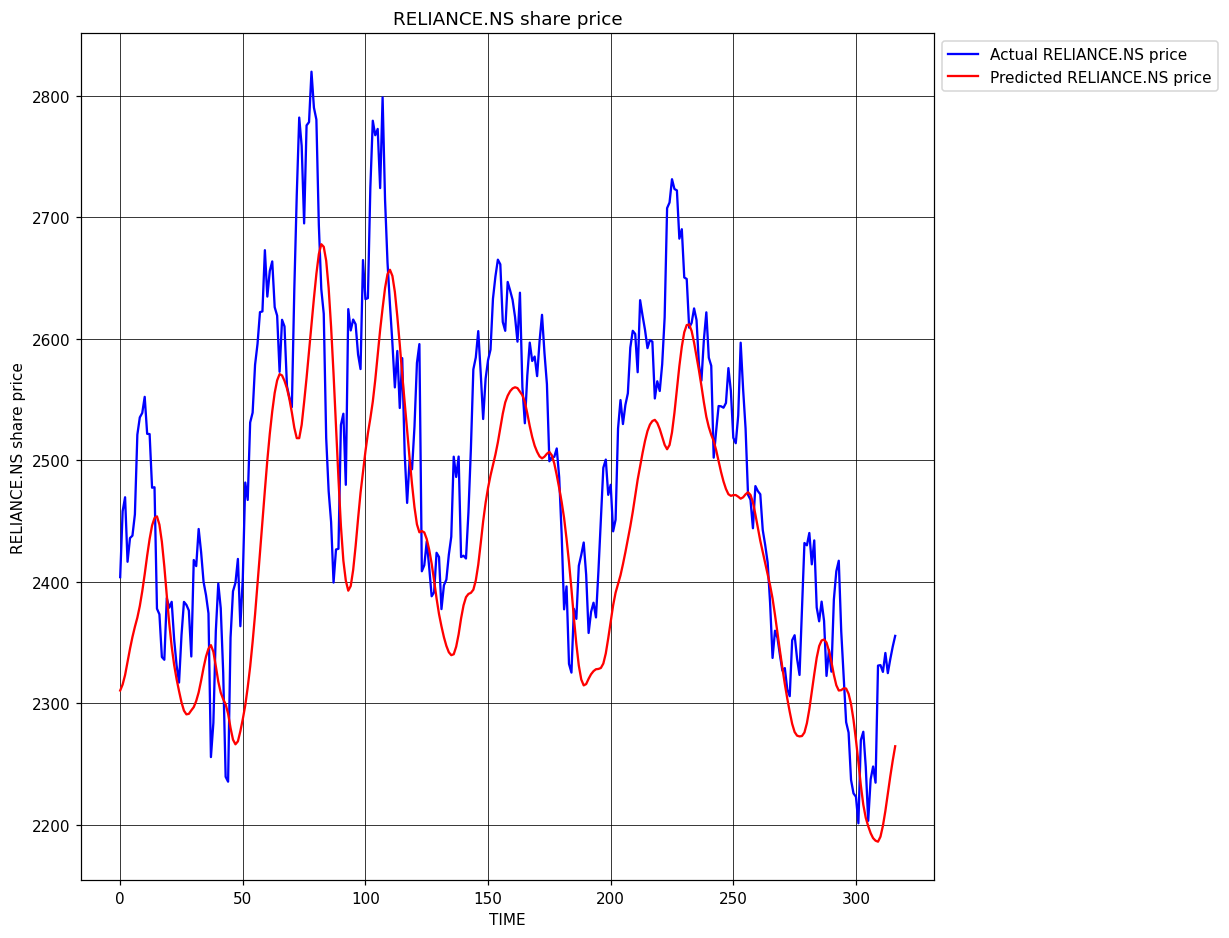

In [ ]:
from matplotlib.patches import bbox_artist
import numpy as np
import matplotlib.pyplot as plt
#import mplfinance as mpl
import pandas_datareader as pdr
import pandas as pd
import datetime as dt
import yfinance as yf
from datetime import date
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout
from sklearn.preprocessing import MinMaxScaler              #Normalization

#import data
company=str(input("Write name of company:"))

start=date(2012,1,1)
end=date(2022,1,1)

data=yf.download(company,start,end)
#print(data)

#Data preprocessing
#Normalization
scaler=MinMaxScaler(feature_range=(0,1))

#We will be using the closing values of stock price of each day.
scaled_data=scaler.fit_transform(data['Close'].values.reshape(-1,1))

prediction_days=int(input("Enter the number of prediction days:"))
x_train,y_train=[],[]
for x in range(prediction_days,len(scaled_data)):
  x_train.append(scaled_data[x-prediction_days:x,0])
  y_train.append(scaled_data[x,0])

x_train,y_train=np.array(x_train),np.array(y_train)
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

#Model 
model=Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=np.true_divide))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=25,batch_size=32)

#Test data and accuracy testing
t_start=date(2022,1,1)
t_end=dt.datetime.now()

test_data=yf.download(company,t_start,t_end)
actual_prices=test_data['Close'].values
total_dataset=pd.concat((data['Close'],test_data['Close']),axis=0)

model_inputs=total_dataset[len(total_dataset)-len(test_data)-prediction_days:].values
model_inputs=model_inputs.reshape(-1,1)
model_inputs=scaler.transform(model_inputs)

#predictions
x_test=[]
for x in range(prediction_days,len(model_inputs)):
  x_test.append(model_inputs[x-prediction_days:x,0])

x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

predicted_prices=model.predict(x_test)
predicted_prices=scaler.inverse_transform(predicted_prices)

#Graph
plt.figure(figsize=(10,10),dpi=110)
plt.plot(actual_prices,color='blue',label=f"Actual {company} price")
plt.plot(predicted_prices,color='red',label=f"Predicted {company} price")
plt.title(f"{company} share price")
plt.xlabel('TIME')
plt.ylabel(f"{company} share price")
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='blue')
plt.legend(bbox_to_anchor=(1,1),loc='upper left')
plt.show()


1/1 [==============================] - 1s 1s/step
Next day prediction for RELIANCE.NS is [[2275.1682]].
But still don't rely on the prediction. Be careful with your decisions!


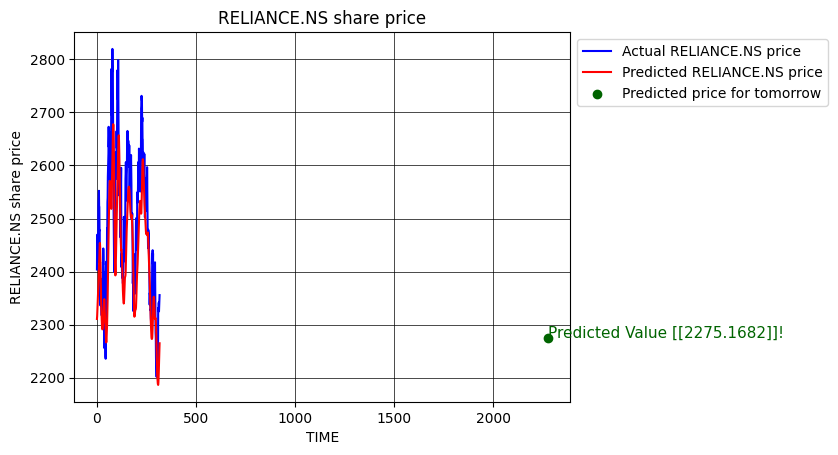

In [ ]:
#Next day prediction
prediction1=[]
#n=[f"Predicted Value {prediction1}!"]
import seaborn as sb
#ax = plt.subplots()

real_data=[model_inputs[len(model_inputs)+1-prediction_days:len(model_inputs+1),0]]
real_data=np.array(real_data)
real_data=np.reshape(real_data,(real_data.shape[0],real_data.shape[1],1))
prediction1=model.predict(real_data)
prediction1=scaler.inverse_transform(prediction1)
print(f"Next day prediction for {company} is {prediction1}.\nBut still don't rely on the prediction. Be careful with your decisions!")

n=[f"Predicted Value {prediction1}!"]

plt.plot(actual_prices,color='blue',label=f"Actual {company} price")
plt.plot(predicted_prices,color='red',label=f"Predicted {company} price")
plt.scatter(x=prediction1[0],y=prediction1[0],color='darkgreen',label=f"Predicted price for tomorrow")
plt.title(f"{company} share price")
plt.xlabel('TIME')
plt.ylabel(f"{company} share price")
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='blue')
plt.legend(bbox_to_anchor=(1,1),loc='upper left')
for i,txt in enumerate(n):
  plt.annotate(txt,(prediction1[i],prediction1[i]),fontsize=11,color='darkgreen')

plt.show()

  


In [ ]:
#3:20PM Prediction on the basis of 3:20 PM price of stock
model_inputs=total_dataset[len(total_dataset)-len(test_data)-prediction_days:].values
model_inputs=np.append(model_inputs, 2356.75)
print(model_inputs.shape)
model_inputs=model_inputs.reshape(-1,1)
model_inputs=scaler.transform(model_inputs)

#predictions
x_test=[]
for x in range(prediction_days,len(model_inputs)):
  x_test.append(model_inputs[x-prediction_days:x,0])

x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

predicted_prices=model.predict(x_test)
predicted_prices=scaler.inverse_transform(predicted_prices)
#prediction1=scaler.inverse_transform(prediction1)#2356.75  ==  [2275.169 ]]
print(f"Stock price prediction of 3:20 PM: {predicted_prices[-1]}")

(378,)
10/10 [==============================] - 1s 53ms/step
Stock price prediction of 3:20 PM: [2275.169]


Stock Analysis

Enter the name of company as listed in equity:RELIANCE.NS
[*********************100%***********************]  1 of 1 completed


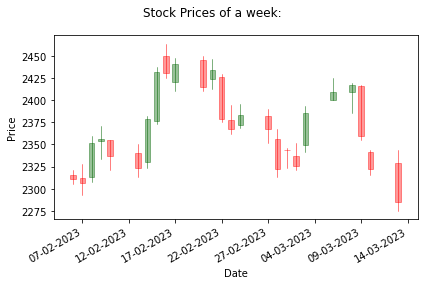

In [ ]:
import matplotlib.pyplot as plt
from mpl_finance import candlestick_ohlc
import pandas as pd
import matplotlib.dates as mpl_dates
import numpy as np
import datetime
from datetime import date
import yfinance as yf

start=date(2023,2,5)
end=datetime.datetime.now()

company=str(input("Enter the name of company as listed in equity:"))
data1=yf.download(company,start,end)

stock_prices = pd.DataFrame(data1)
stock_prices.head()

stock_prices['Date'] = stock_prices.index
ohlc = stock_prices.loc[:, ['Date','Open', 'High', 'Low', 'Close']]
ohlc['Date'] = pd.to_datetime(ohlc['Date'])
ohlc['Date'] = ohlc['Date'].apply(mpl_dates.date2num)
ohlc = ohlc.astype(float)
  
# Creating Subplots
fig, ax = plt.subplots()
  
candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='darkgreen',
                 colordown='red', alpha=0.4)
  
# Setting labels & titles
ax.set_xlabel('Date')
ax.set_ylabel('Price')
fig.suptitle('Stock Prices of a week:')
  
# Formatting Date
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()
  
fig.tight_layout()
  
plt.show()


In [ ]:
stock_prices.head()


,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2012-01-02,345.128540,351.542725,340.348846,349.957764,322.067078,8679938,2012-01-02
2012-01-03,352.780975,360.037201,351.839905,358.922760,330.317627,9455771,2012-01-03
2012-01-04,360.284851,362.043182,353.325836,354.712677,326.443085,8557084,2012-01-04
2012-01-05,354.143066,359.071350,343.791199,346.465851,318.853485,13364666,2012-01-05
2012-01-06,345.252350,358.600830,345.054230,355.406097,327.081177,9495456,2012-01-06
